# Sensor Data Fusion
Lecturer: Prof. Baum \
Tutor: Shishan Yang and Laura Wolf\
Semester: Winter 20/21
## Homework 4

Given are two one-dimensional (uncorrelated) sensor readings $y_1\in\mathbb{R}$ and $y_2\in\mathbb{R}$ of a one-dimensional location $x\in\mathbb{R}$.\
The variances of the errors are $\sigma_1^2=2$ for the first and $\sigma_2^2=3$ for the second sensor.
        

---
The following tasks will have missing sections marked that you should fill out. 

Missing code parts are marked by
```
# ... code code code
=== YOUR CODE HERE ===

=== END OF YOUR CODE ===
# ... code code code
```
If you are asked to implement a function, make sure to check what variable will be returned by the function and to fill it accordingly. Do not change code outside of the indicated sections.

Furthermore, some questions require theoretical answers instead of python code.

Such questions will have a field marked like this: 

=== YOUR ANSWER HERE === 

In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import inv

---
### a)
Formulate the (joint) measurement equation for the fusion of the two measurements.

=== YOUR ANSWER HERE ===

$$
 \underbrace{\begin{pmatrix}y_1\\y_2\end{pmatrix}}_y = \underbrace{\begin{pmatrix}1\\1\end{pmatrix}}_H x + \underbrace{\begin{pmatrix}e_1\\e_2\end{pmatrix}}_e\\
 e\in\mathcal{N}(0, C)\\
 C=\begin{pmatrix}
 2 & 0\\
 0 & 3
 \end{pmatrix}
 $$

---
### b)
Now, implement the measurement model from a).

Then, write a function that simulates $m=1000$ measurements using the measurement model in a) with true $x=2$.

In [2]:
# def. of variables:

# true location
x = 2

# m, the number of samples
nr_samples = 10000

# Measurement matrix H and Error Covariance Ce:
# Implement the measurement model here. You can see the correct dimensions of H and Ce at the end of this cell!

# === YOUR CODE HERE ===
# H = ...
H = np.array([1, 1])
H = np.reshape(H, (2, -1))

# Ce = ...
Ce = np.array([[2, 0],
              [0, 3]])
# === END OF YOUR CODE ===

H = np.array(H)
assert H.shape == (2,1)  # H should be of shape 2x1
Ce = np.array(Ce)
assert Ce.shape == (2,2)  # Ce should be of shape 2x2

In [4]:
def generate_sample(x, m, H, Ce):
    """
    Function that generates a sample of size m for measurement matrix H, Error Covariance Ce and true location x
    :param x: true location, scalar
    :param m: The number of samples
    :param H: measurement matrix
    :param Ce: error cov matrix
    :return: y_sam, the sample of measurements
    """
    
    # === YOUR CODE HERE ===
    
    # First, we sample our errors
    e_sam = np.random.multivariate_normal(np.array([0, 0]), Ce, m).T
    # Then, we create 1000 true measurements (all [2, 2]) and add our errors
    y_sam = np.tile(H*x, m) + e_sam
    
    # === END OF YOUR CODE ===
    
    # the resulting array needs to be of shape (no_measurements, no_samples)
    # which should be (2, nr_samples) for this exercise
    assert y_sam.shape == (len(H), m)
    
    # return the result
    return y_sam

# Now, we sample nr_samples measurements for later use:
y_sam = generate_sample(x, nr_samples, H, Ce)

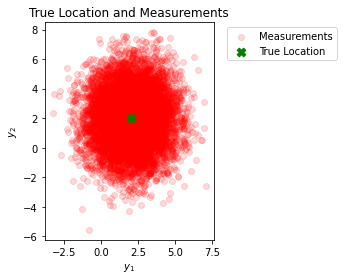

In [5]:
# Let's take a look at our measurements:
plt.scatter(y_sam[0,:], y_sam[1, :], c='r', label="Measurements", alpha=0.15)
plt.scatter(x, x, c='g', label="True Location", marker="X", s=75)
plt.title("True Location and Measurements")
plt.legend(bbox_to_anchor=(1.05,1))
plt.axis('scaled')
plt.xlabel("$y_1$")
plt.ylabel("$y_2$")
plt.show()

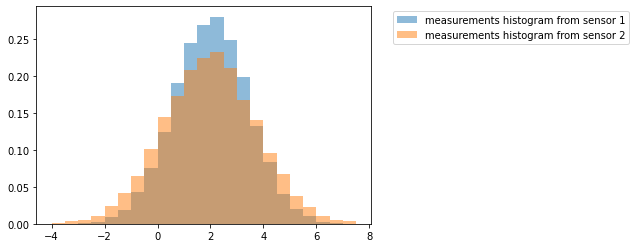

In [14]:
plt.hist(y_sam[0,:],bins=np.arange(-4,8,0.5),density=True,alpha=.5,label='measurements histogram from sensor 1')
plt.hist(y_sam[1,:],bins=np.arange(-4,8,0.5),density=True,alpha=.5,label='measurements histogram from sensor 2')
plt.legend(bbox_to_anchor=(1.05,1))

---
### c)

For each simulated measurement, calculate the weighted least squares (WLS) solution using $W^{-1}=\begin{pmatrix}2 & 0\\0 & c\end{pmatrix}$ with $c=1,...,10$. 

Which value for $c$ provides the BLUE estimate?

First, calculate the WLS solution for all $c$-s and each simulated measurement.
Consider visualizing the results!

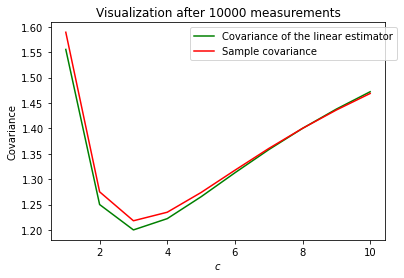

In [7]:
# === YOUR CODE HERE ===

x_ls = np.zeros((10, nr_samples))
cov = np.zeros((10, 1))
cov_samp = np.zeros((10, 1))
for c in range(1, 11):
    # define W^{-1}
    W_inv = [[2, 0],
        [0, c]]
    # Calculate the inverse
    W = inv(np.array(W_inv))
    
    # calculate K
    K = inv(H.T @ W @H) @ H.T @ W
    
    # now, iterate the sample
    for i in range(nr_samples):
        x_ls[c-1, i] = K @ y_sam[:,i]
        
    # calc stats for this c
    x_mean = np.mean(x_ls[c-1, :])
    var = (x_ls[c-1, :] - x_mean)**2
    cov_samp[c-1] = sum(var) / (nr_samples-1)

    cov[c-1] = K @ Ce @ K.T
    
# visualization:
plt.plot(range(1,11), cov, c='g', label="Covariance of the linear estimator")
plt.plot(range(1,11), cov_samp, c='r',label="Sample covariance")
plt.legend(bbox_to_anchor=(1.05,1))
plt.xlabel("$c$")
plt.ylabel("Covariance")
plt.title("Visualization after "+str(nr_samples)+" measurements")
plt.show()

# plt.plot(3*np.ones(np.arange(1.2,1.5,0.01).shape),np.arange(1.2,1.5,0.01),linestyle='--',color='C0')
# === END OF YOUR CODE ===

Which value for 𝑐 provides the BLUE estimate?

=== YOUR ANSWER HERE ===

$$
   x^{LS}=\underbrace{(H^{\text{T}}WH)^{-1}H^{\text{T}}W}_Ky=(\frac{1}{2}+\frac{1}{c})^{-1}\cdot(\frac{y_1}{2}+\frac{y_2}{c})
$$
   Using $c=3$, we get the BLUE estimate, because then we get $W^{-1}=C$.

---
### d)

Derive an analytic formula for the variance of the weighted least squares solution, using the $W$ providing the BLUE estimate.

=== YOUR ANSWER HERE ===

$
   Cov\{x^{LS}\}=KCK^{\text{T}}
$
   
$
         =(H^{\text{T}}WH)^{-1}H^{\text{T}}WCWH(H^{\text{T}}WH)^{-1}
$

$
=(H^{\text{T}}C^{-1}H)^{-1}H^{\text{T}}C^{-1}CC^{-1}H(H^{\text{T}}C^{-1}H)^{-1}
$

$
        =(H^{\text{T}}C^{-1}H)^{-1}H^{\text{T}}C^{-1}H(H^{\text{T}}C^{-1}H)^{-1}
$

$
=(H^{\text{T}}C^{-1}H)^{-1}
$

---
### e)

Check if the analytical solution coincides with the empirical variance of the WLS solution from c)

=== YOUR ANSWER HERE ===

Using the following code, we can confirm whether the two variance values coincide:
```
print(inv(H.T@inv(Ce)@H))
print(min(cov))
```
This shows that indeed both values are equal, at `1.2`

Empirically, the optimal $c$ is the argmin of the covariance of the linear estimator from c), which is 3.\
As answered in c), this is also the value providing the BLUE estimate.

In [15]:
print(inv(H.T@inv(Ce)@H))
print(min(cov))

[[1.2]]
[1.2]
